# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>Julio Pérez Cabeza</mark>

In [1]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='blue'>**Ejercicio 4: Primeros pasos de IA explicable aplicada a redes neuronales convolucionales (1,5 puntos)**
<font color='blue'>En este ejercicio trabajaremos con el conjunto de datos Caltech-UCSD Birds-200-2011 (https://www.vision.caltech.edu/datasets/cub_200_2011/). Este conjunto de datos consta de $11788$ imágenes de $200$ especies de aves diferentes. Tiene $200$ clases, con $5994$ para entrenamiento y $5794$ para pruebas. El $10\%$ del conjunto de entrenamiento se dejará para validación.

<font color='blue'>Usaremos el modelo de red ResNet18 ya preentrenado con ImageNet, que se puede descargar desde el repositorio de modelos de fastai. Se realizará un fine-tuning de toda la red (por $10$ épocas) tras haber incorporado una cabecera adecuada para este problema (con una única fully-connected layer). Es decir, se debe hacer algo similar a lo realizado en el apartado cuarto del ejercicio 3.





---



---



---

First, we need to read the data from the URL

In [3]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [4]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [5]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [6]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 60 60 60 60 59 50 60 60 60 53 59 60 60 60 60 60 60 41 60 60 60 59 59 60 60 45 60 60 44 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60 58 60 60 60 60 60 50 59 59 60 60 60 60 60 60 60 60 60 58 60 60 59 59 60 60 60 60 48 60 60 58 59 60 60 49 60 60 60 60 60 59 50 60 59 59 60 60 60 60 57 59 60 60 60 50 60 60 59 60 60 60 60 56 58 60 60 60 60 56 59 58 53 60 60 60 60 60 60 59 60 59 60 60 51 56 60 60 59 60 60 60 60 60 59 60 60 60 60 60 52 60 57 58 60 59 60 60 60 60 59 60 60 60 60 60 59 60 60 60 60 60 59 60 59 59 60 53 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 60 60 60 

In [7]:
#Ahora tenemos en images_list la lista con todas las imágenes, y en train_test_split cuáles pertenecen a training (1) o a test (0)
# Vamos a crear dos carpetas: una train y otra test, y vamos a meter dentro las imágenes correspondientes
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [8]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/098.Scott_Oriole'), Path('/root/.fastai/data/CUB_200_2011/train/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/train/195.Carolina_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/142.Black_Tern'), Path('/root/.fastai/data/CUB_200_2011/train/129.Song_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/023.Brandt_Cormorant'), Path('/root/.fastai/data/CUB_200_2011/train/113.Baird_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/086.Pacific_Loon'), Path('/root/.fastai/data/CUB_200_2011/train/120.Fox_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/002.Laysan_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/032.Mangrove_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/train/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/183.Northern_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/038.Great_Crested_Fly

In [9]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [10]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))


Total training images:  5994
Total test images:  5794


####**Definición del Dataloader**

Como ya hemos trabajado en las anteriores partes con este tipo de objetos, no será necesario pararse demasiado a explicar los parámetros, pero en general:

* Establecemos que estamos trabajando con imágenes y categorías.
* El conjunto de validación será del $10\%$.
* Hemos de hacer resize a $224$ x $224$, pues no todas las imágenes tienen la misma dimensión. Hacemos a $224$ x $224$ pues ResNet18 fue entrenada en ImageNet, que son imágenes con estas dimensiones.
* Normalizamos cada una de las entradas, usando las estadísticas de ImageNet, que es un buen estándar, y, de hecho, hay algunas imágenes de este dataset que están en ImageNet también.

Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 5395
Numero de ejemplos de validacion: 599


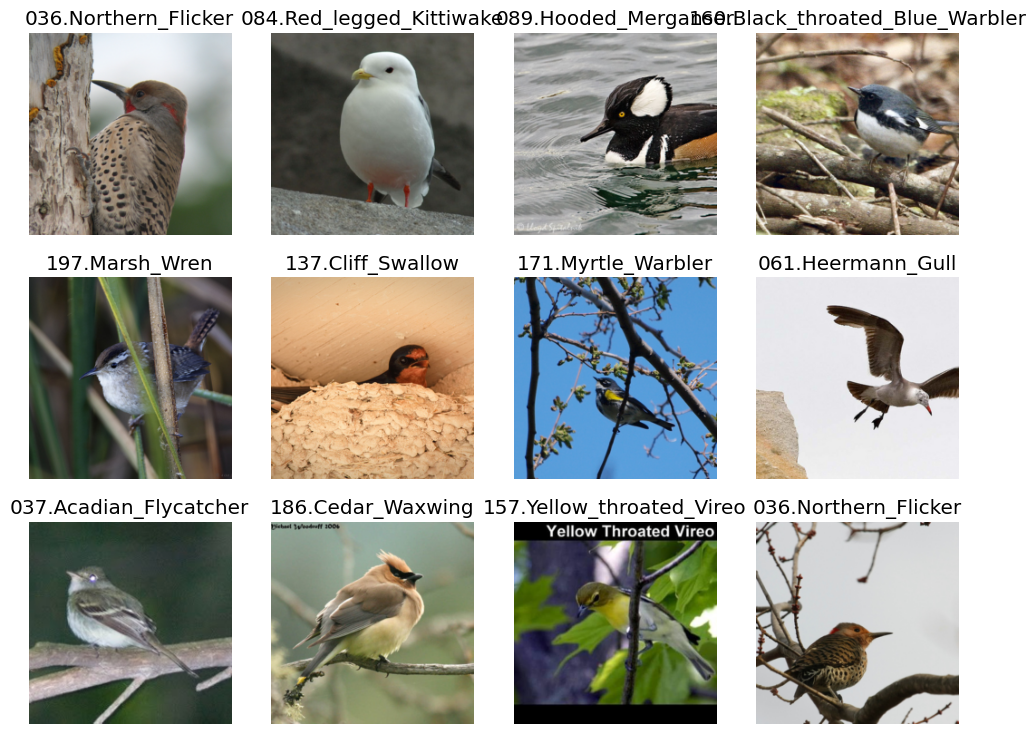

In [11]:
CUB_200_2011 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
              get_items = get_image_files,
              splitter  = RandomSplitter(valid_pct = 0.1, seed = 42),
              get_y     = parent_label,
              item_tfms = Resize(224),
              batch_tfms = [Normalize.from_stats(*imagenet_stats)]
              )

dls = CUB_200_2011.dataloaders(path/'train', bs = 32)

dls.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls.train_ds))
print('Numero de ejemplos de validacion:', len(dls.valid_ds))

####**Implementación y fine-tuning de la red**

De igual manera que para el problema de clasificación en CIFAR100 para 25 clases que hacíamos en el ejercicio 2, ahora hemos de usar la siguiente función de pérdida:

In [12]:
from fastai.metrics import *
loss_func = CrossEntropyLossFlat()

De nuevo, replicando el trabajo hecho en el ejercicio 3, hemos de ver cuántas entradas tiene la capa Fully Connected de ResNet18, para así poder definir la nuestra propia:

In [13]:
resnet18().fc

Linear(in_features=512, out_features=1000, bias=True)

Podemos entonces crear nuestra cabecera personalizada, que consiste en hacer un *Global Average Pooling* de $1$ x $1$, un `Flattening()` y por último una capa lineal de 512 entradas y 200 salidas (número de clases):

In [14]:
custom_head = nn.Sequential(
    nn.AdaptiveAvgPool2d((1,1)),
    Flatten(),
    nn.Linear(512, 200)
)

Congelamos todas los pesos, pues vamos a usar los preentrenados de ResNet18. Dicha red tiene una estructura similar a ResNet50, explicada en el ejercicio anterior, solo que esta cuenta conu un número menor de capas ocultas, 18.

Usaremos como métricas de validación la `accuracy` y `F1Score` (weighted). Construimos el objeto `Learner`, con la función de pérdida, el modelo, el conjunto de datos, las métricas comentadas y la cabecera creada:

In [15]:
learn = vision_learner(dls, resnet18, loss_func = loss_func, metrics = [accuracy, F1Score(average='weighted')], pretrained = True,
                       custom_head = custom_head, train_bn = True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 85.9MB/s]


Procedemos entonces a realizar el **fine-tuning de la red durante 10 épocas**:

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Aproximación learning rate: 0.0010000000474974513


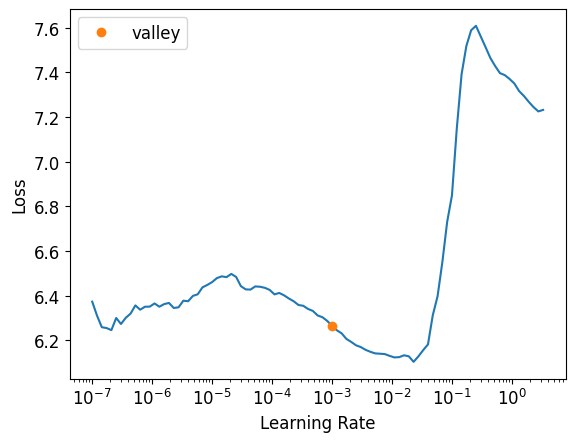

In [16]:
lr = learn.lr_find()
print("Aproximación learning rate:", lr.valley)

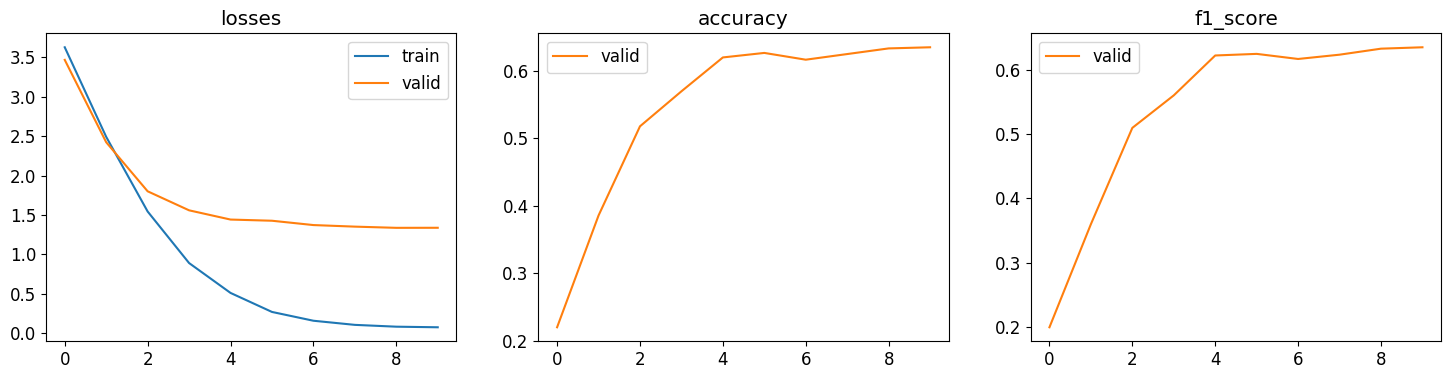

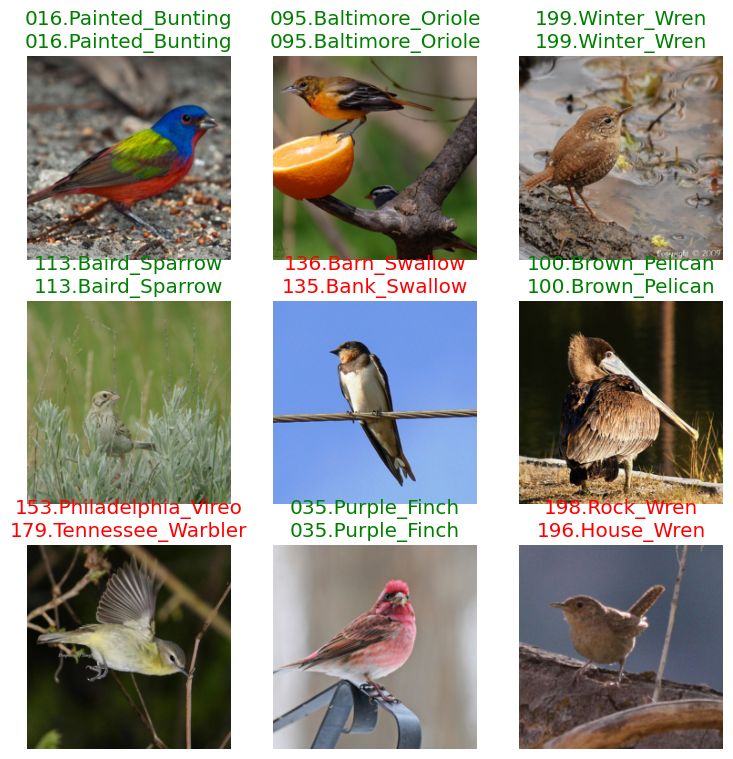

In [17]:
learn.fine_tune(epochs = 10, base_lr = lr.valley)
learn.recorder.plot_metrics()
learn.show_results()

ℹ️ Para este ejercicio no se mostrarán los resultados en entrenamiento, validación ni test, ni las correspondientes matrices de confusión. El objetivo es el aprender el uso de GradCAM, que se hace ahora más adelante, y no es tanto obtener buenos resultados en la clasifición. Con saber que la red ha aprendido sobre nuestro problema específico es suficiente.

## <font color='blue'> Uso de GradCAM para analizar el comportamiento de redes convolucionales

<font color='blue'> Una vez entrenado el modelo, se debe aplicar Grad-CAM para visualizar los mapas de activación del último bloque convolucional. Para ello, los alumnos deben emplear el paquete `grad-cam`: `!pip install grad-cam`. Se trata de una librería con métodos del estado del arte para dotar de explicabilidad a modelos de visión por computador. Se recomienda encarecidamente revisar con calma la documentación relativa a dicho paquete (https://jacobgil.github.io/pytorch-gradcam-book/introduction.html y https://github.com/jacobgil/pytorch-grad-cam) y basarse en los ejemplos allí indicados de cara a realizar la implementación. El alumnado debe emplear Grad-CAM con, al menos, $5$ imágenes de test, así como interpretar los resultados obtenidos.

<font color='blue'> ¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?


<font color='blue'> Referencia: https://arxiv.org/pdf/1610.02391.pdf

In [18]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39588 sha256=1d9a84a51493c91d76be3c2747073b021de88f3da8cb59deb2f8842a0a0951af
  Stored in directory: /root/.cache/pip/wheels/50/b0/82/1f97b5348c7fe9f0ce0ba18497202cafa5dec4562bd5292680
Successfully built grad-cam


####**Explicación de GradCAM**

**¿Qué entendemos por IA explicable y qué pinta gradCAM en todo esto?**

La necesidad de la explicabilidad de la IA surge debido a que muchos modelos, especialmente aquellos basados en redes neuronales profundas (Deep Learning), son considerados "**cajas negras**" porque su funcionamiento interno es complejo y difícil de interpretar, sobre todo aquellos más profundos.

Esto es aplicable a cualquier ámbito en que se emplee la IA, pues es de crucial necesidad entender por qué se toman las decisiones que se toman y el justificarlas es tan importante casi como la decisión en si.

<center><img src = https://th.bing.com/th/id/OIP.t_4nXTF7jDuwS2_nI3uElwHaE-?rs=1&pid=ImgDetMain height = '200'></center>

Por ejemplo, en el contexto en el que nos movemos nosotros, en un sistema de clasificación, **¿qué características de una imagen llevaron a asignar una clase específica?**

Aquí entra GradCAM:

$$$$

**Grad-CAM (Gradient-weighted Class Activation Mapping)**
Grad-CAM es un método utilizado dentro de la IA explicable, especialmente para interpretar modelos de clasificación de imágenes. Fue introducido en 2017 en el paper "Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization", [https://arxiv.org/pdf/1610.02391].

Grad-CAM permite visualizar qué partes de una imagen influyen más en la predicción de un modelo.

**¿Cómo funciona?**

Grad-CAM se basa en los gradientes de las predicciones respecto a las activaciones de una capa convolucional específica. Los pasos básicos son:

* **Seleccionar la capa convolucional**: Generalmente, se elige la última capa convolucional del modelo. Esta capa contiene características espaciales y semánticas importantes.

>  <font color = 'gray'> "Furthermore, convolutional layers naturally retain spatial
 information which is lost in fully-connected layers, so we
 can expect the last convolutional layers to have the best com
promise between high-level semantics and detailed spatial
 information. The neurons in these layers look for semantic
 class-specific information in the image (say object parts)."

* **Calcular los gradientes**:
Se obtienen los gradientes de la clase a predecir (probabilidad de la clase predicha, dada por la softmax) con respecto a las características de la capa seleccionada.

* **Ponderación de las características**: Los gradientes se promedian a través de los mapas de características para obtener un peso de importancia para cada canal de la capa.

* **Generar el mapa de activación**: Se combina linealmente los mapas de características de la capa convolucional con sus pesos calculados y se aplica una función ReLU para obtener las regiones de interés.

>  <font color = 'gray'> "The heatmap is calculated by weighting the activations by the average gradient and applying a ReLU activation to remove negative values. The heatmap highlights the regions in the image that are important for the prediction."

* **Superponer en la imagen original**: El mapa de Grad-CAM resultante se redimensiona al tamaño de la imagen original y se superpone para destacar las áreas importantes.


> ℹ️ Ver [https://medium.com/@codetrade/grad-cam-in-pytorch-a-powerful-tool-for-visualize-explanations-from-deep-networks-bdc7caf0b282]



In [19]:
dls = CUB_200_2011.dataloaders(path/'test', bs = 1, transforms = ToTensor())

####**Implementación de GradCAM**

Los pasos a seguir se detallan aquía abajo, y más tarde, como se nos indica en el enunciado se procede a probar GradCAM en 5 imágenes distintas del conjunto de test:

$$$$

* Se carga el subconjunto de test del dataset en un dataloader.

  ```
dls = CUB_200_2011.dataloaders(path/'test')
img, label = dls.valid_ds[{Indice de la imagen}]
```

* La imagen se normaliza al rango [0, 1] y se transforma en el formato adecuado para PyTorch. Para ello usamos `preprocess_image`.
```
rgb_img = np.float32(img) / 255
input_tensor = preprocess_image(rgb_img)
```

* El modelo se obtiene desde `learn.model`, que corresponde a la red preentrenada, definida anteriormente.
```
model = learn.model
```

* La capa objetivo (`target_layers`) es la última capa convolucional del modelo.
```
target_layers = [model[0][-1]]
```

* Se usa `ClassifierOutputSoftmaxTarget` para definir la clase específica (`predicted_label`) que queremos analizar. Para hacer la predicción del modelo para la muestra, se hace:
```
model.eval()
input_tensor = input_tensor.to(torch.device('cuda'))
output = model(input_tensor)
predicted_label = output.argmax(dim=1).item()
targets = [ClassifierOutputSoftmaxTarget(predicted_label)]
```

* Se inicializa GradCAM con el modelo y la capa objetivo. Luego se calcula el mapa de calor o *heatmap* con la clase objetivo como referencia.

  ```
with GradCAM(model=model, target_layers=target_layers) as cam:
  grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0, :]
```

* Se utiliza `show_cam_on_image` para superponer el mapa Grad-CAM a la imagen original.

  ```
cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
```

* La imagen resultante con el mapa superpuesto se convierte a formato PIL para visualizarla.
  ```
Image.fromarray(cam_image)
```

$$$$

Ahora procedemos a hacerlo para **5 imágenes aleatorias** del conjunto de tests:

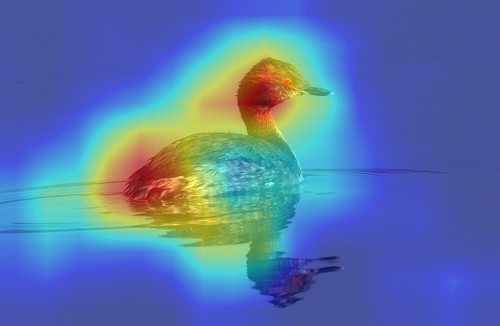

In [57]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputSoftmaxTarget

dls = CUB_200_2011.dataloaders(path/'test')

img, label = dls.valid_ds[0]

rgb_img = np.float32(img) / 255
input_tensor = preprocess_image(rgb_img)

model = learn.model
model.eval()
input_tensor = input_tensor.to(torch.device('cuda'))
output = model(input_tensor)
predicted_label = output.argmax(dim=1).item()
targets = [ClassifierOutputSoftmaxTarget(predicted_label)]

target_layers = [model[0][-1]]

with GradCAM(model=model,
             target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Image.fromarray(cam_image)

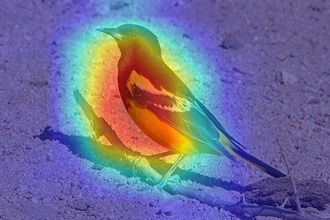

In [58]:
img, label = dls.valid_ds[40]
targets = [ClassifierOutputSoftmaxTarget(label)]

rgb_img = np.float32(img) / 255
input_tensor = preprocess_image(rgb_img)
with GradCAM(model=model,
             target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Image.fromarray(cam_image)

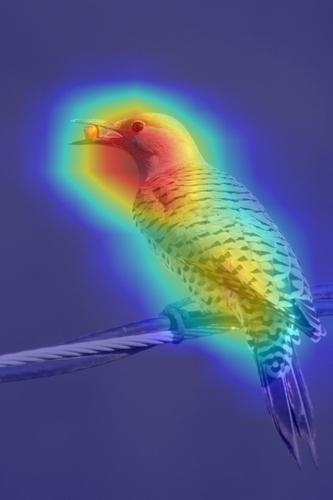

In [59]:
img, label = dls.valid_ds[500]
targets = [ClassifierOutputSoftmaxTarget(label)]

rgb_img = np.float32(img) / 255
input_tensor = preprocess_image(rgb_img)
with GradCAM(model=model,
             target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Image.fromarray(cam_image)

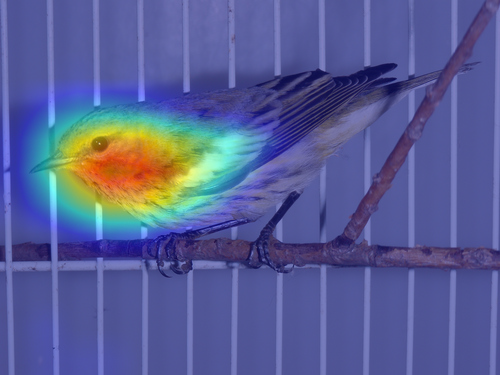

In [60]:
img, label = dls.valid_ds[150]
targets = [ClassifierOutputSoftmaxTarget(label)]

rgb_img = np.float32(img) / 255
input_tensor = preprocess_image(rgb_img)
with GradCAM(model=model,
             target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Image.fromarray(cam_image)

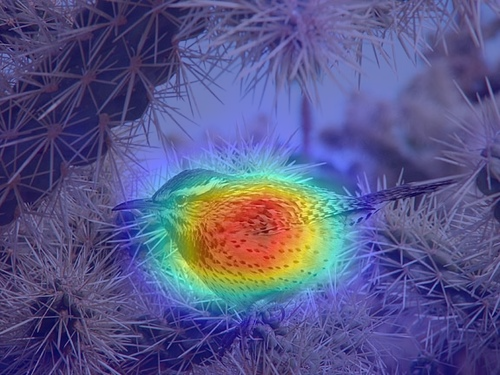

In [62]:
img, label = dls.valid_ds[100]
targets = [ClassifierOutputSoftmaxTarget(label)]

rgb_img = np.float32(img) / 255
input_tensor = preprocess_image(rgb_img)
with GradCAM(model=model,
             target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor,
                        targets=targets)[0, :]
    cam_image = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Image.fromarray(cam_image)

> 📦 Toda la implementación explicada ha sido seguida del tutorial [https://github.com/jacobgil/pytorch-grad-cam/blob/master/cam.py]

####**📊Análisis y conclusiones**

A priori, el algoritmo parece estar funcionando correctamente, pues podemos fijarnos una a una en las superposiciones de los mapas de calor y las imágenes de test y darnos cuenta de las "características" que está recogiendo nuestra red. De esta manera, podríamos justificar el por qué se ha clasificado cierta muestra con una clase en concreto, o incluso entender el por qué se ha clasificado incorrectamente una instancia.

Por ejemplo, en la tercera imagen, el animal parece tener un fruto en el pico. El fruto está dentro de la región coloreada en el mapa de calor, por tanto se tendría en cuenta en la clasificación de nuestra red. Si infierese incorrectamente la clase para esa imagen, podríamos tratar de justificar por qué e incluso corregirlo.

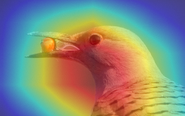

**¿Qué conclusiones se extraen de los experimentos realizados?**

* Permite entender qué partes de la imagen influyen en la decisión del modelo.
* Aunque es popular en clasificación, GradCAM también puede aplicarse en segmentación, detección de objetos y otros problemas de visión. Se puede ver en los enlaces proporcionados por el profesor.
* Se puede usar en las capas que queramos realmente, por lo que puede servir para entender en profundidad las características extraídas en cada capa convolucional.
* GradCAM ayuda a detectar **sesgos** en el modelo.

$$$$


**¿Qué contrapartidas tiene?**

No explica decisiones complejas. Si la decisión involucra combinaciones complejas de características, Grad-CAM no siempre puede descomponerlas de manera intuitiva, como es normal, pues solo trata con información sintetizada en los gradientes del modelo.

Además, si el modelo es de baja calidad o hace predicciones erróneas, GradCAM podría destacar regiones irrelevantes de la imagen, generando mapas de calor ambiguos. En este caso no sería tan útil.

$$$$

Aún así, a mi parecer, las desventajas que tengan son menos importantes que las ventajas que pueda aportar. Cuando se trata de explicabilidad, entender mínimamente por qué ocurren ciertas cosas nos pueden orientar de manera muy positiva a la toma de decisiones y resolución del problema tratado. El uso de estas técnicas es cada vez más importante, debido al gran crecimiento de técnicas cada vez más profundas.
